<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE32338](https://jckantor.github.io/CBE32338)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE2338.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Four State Model](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/02.06-Four-State-Model.ipynb) | [Contents](toc.ipynb) | [TCLab Lab 2: Model Identification](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification-Solutions.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/CBE32338/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification-Solutions.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# TCLab Lab 2: Model Identification

For this laboratory session you will collect data from a step test experiment, then fit the data to models derived from first-principles energy balances. Fitting models to data is an engineering skill that links between the real world of engineering systems to the theory you've been learning in the classroom.

## Procedures

1. Please work in groups of two.

2. Check out a TCLab kit. The kit consists of
    * plastic container
    * Arduino device with the TCLab shield installed
    * 5 watt USB power supply
    * USB power cable
    * USB data cable
    * equipment log sheet
    
   Before going further, sign and date the equipment log sheet. 

3. Download a copy of this notebook to your laptop, and complete the exercises shown below. Under each exercise heading, add as many text and code cells as needed to complete the exercise. The results should be embedded in the notebook. Be sure to 'save-as-you-go' to avoid losing your work.

4. Add any relevant notes to the equipment log and return the kit to equipment at the front of the lab. **Return any malfunctioning kit to the instructor for repair.**

5. Submit your completed lab notebook via Sakai.  The notebook should contain the name of both lab partners. Both partners should submit a copy of the notebook.

## Exercise 1. Verify operation of the temperature control lab.

Execute the following cell to verify that you have a working connection to the temperature control lab hardware. This will test for installation of TCLab.py, connection to the Arduino device, and working firmware within the Arduino.

In [1]:
from tclab import TCLab, clock, Historian, Plotter

lab = TCLab()
print("TCLab Temperatures:", lab.T1, lab.T2)
lab.close()

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodemWUART1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab Temperatures: 23.81 23.48
TCLab disconnected successfully.


## Exercise 2.  Check for steady state

As discussed in class, for good model fitting it is essential for the TCLab hardware to be at steady state before proceeding with the step test. Run the following code to verify that the heaters are off and that the temperatures are at a steady ambient temperature.

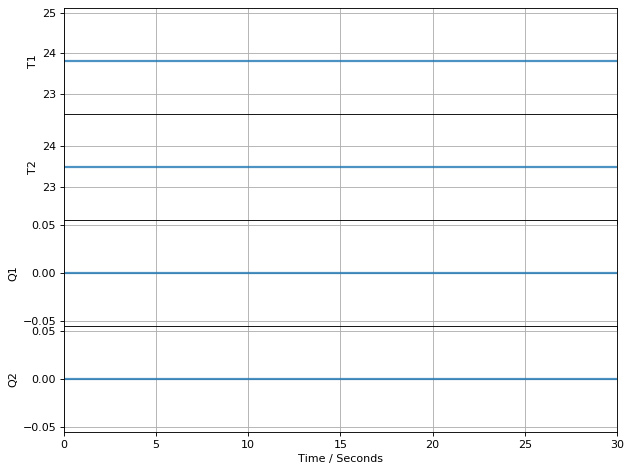

TCLab disconnected successfully.


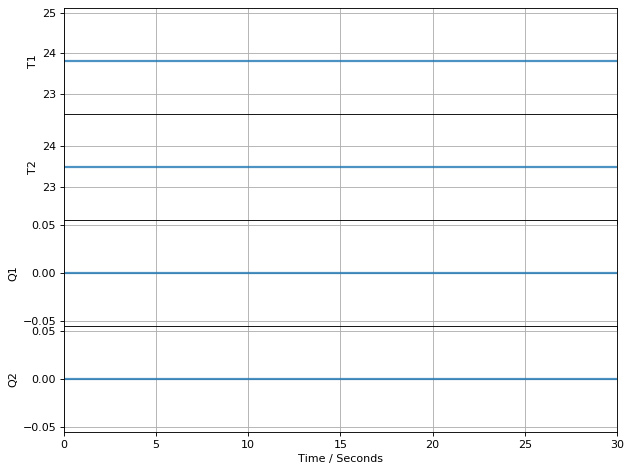

In [2]:
# experimental parameters
tfinal = 30

# perform experiment
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    for t in clock(tfinal):
        p.update(t)

## Exercise 3. Step test.

The step test consists of turning on one heater at 50% power and recording temperature data for at least 800 seconds. Copy and paste the code from Exercise 2 into the following cell, then modify as needed to accomplish the step test. 

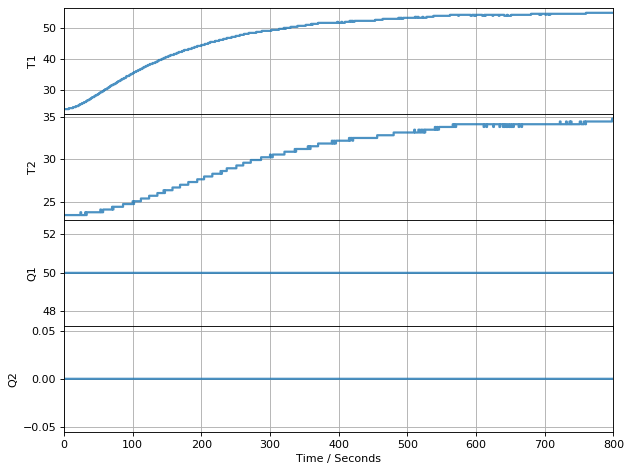

TCLab disconnected successfully.


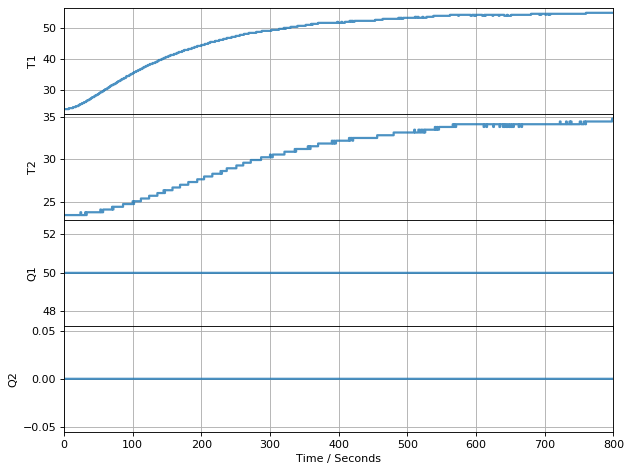

In [3]:
# experimental parameters
tfinal = 800
Q1 = 50

# perform experiment
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(Q1)
    for t in clock(tfinal):
        p.update(t)

## Exercise 4. Verify and save data to a .csv file

Run the following cell to verify and save your data to a '.csv' file. Be sure you can find and locate the data on your laptop before leaving the lab. You will need access to this data for subsequent exercises.

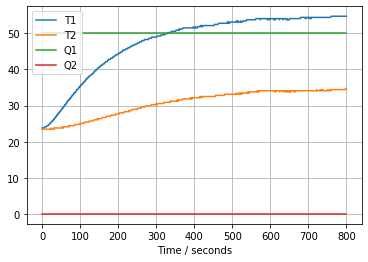

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

t, T1, T2, Q1, Q2 = h.fields

plt.plot(t, T1, t, T2, t, Q1, t, Q2)
plt.legend(['T1','T2','Q1','Q2'])
plt.xlabel('Time / seconds')
plt.grid()

h.to_csv('tclab-data.csv')

## Exercise 5. Analysis

1.) Approximating the the step test results for T1 as a first order transfer function, estimate the time constant and gain. Write your answer in the following cell.

A first order system transfer function is described by the differential equation

$$ \tau \frac{dy}{dt} + y = K u $$

where $y$ is the deviation in process output and $u$ is the deviation in process input relative to a nominal condition. In this instance, the deviation variables are $u = Q_1$ and $y = T_1 - T_{amb}$. The process gain $K$ can be estimated from the steady state condition at the end of the step test. 

$$K = \frac{y_{ss}}{u_{ss}} = \frac{54.75 - 23.81}{50} = 0.62$$

The time constant $\tau$ can be estimated as the time required to achieve 63.2% of the final response. That value of $T_1$ can be computed as 

$$23.81 + 0.632*(54.75-23.81) = 43.4$$

This is about $\tau = 186$ seconds from the inspection of the data.  These calculations are verified in the following code cell.

In [18]:
K = (T1[-1] - T1[0])/Q1[0]
print("Gain K = ", K, "degrees C per percent increase in Q1")

T = T1[0] + 0.632*(T1[-1] - T1[0])
print("63.2% of the final temperature rise corresponds to", T, "degrees C")

tau = t[min([k for k in range(0, len(T1)) if T < T1[k] ])]
print("tau =", tau, "seconds")

Gain K =  0.6188 degrees C per percent increase in Q1
63.2% of the final temperature rise corresponds to 43.36408 degrees C
tau = 186.0 seconds


2.) As we discussed in class, a simple energy balance model for T1 is given by

$$C_p \frac{dT_1}{dt} = U_a(T_{amb} - T_1) + P Q_1$$

where the parameter $P$ has, through independent means, been determined as 0.04 watts per percent increase in $Q_1$. Use the results of this experiment to estimate values for $C_p$ and $U_a$. Write your answers in the following cell.

$$K = \frac{P}{U_a} \implies U_a = \frac{P}{K} = \frac{0.04}{0.62} = 0.065 \text{ watts/deg C}$$

$$\tau = \frac{C_p}{U_a} \implies C_p = \tau U_a = \frac{\tau P}{K} = \frac{186 \times 0.04}{0.62} = 12 \text{ J/deg C}$$

In [20]:
P = 0.04

Ua = P/K
print("Heat transfer coefficient Ua =", Ua, "watts/degree C")

Cp = tau*P/K
print("Heat capacity =", Cp, "J/deg C")

Heat transfer coefficient Ua = 0.06464124111182935 watts/degree C
Heat capacity = 12.023270846800258 J/deg C


<!--NAVIGATION-->
< [Four State Model](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/02.06-Four-State-Model.ipynb) | [Contents](toc.ipynb) | [TCLab Lab 2: Model Identification](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification-Solutions.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/CBE32338/master/notebooks/02.10-TCLab-Lab-2-Model-Indentification-Solutions.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>